In [183]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
# Read in the image 
img  = cv2.imread("cells.png")

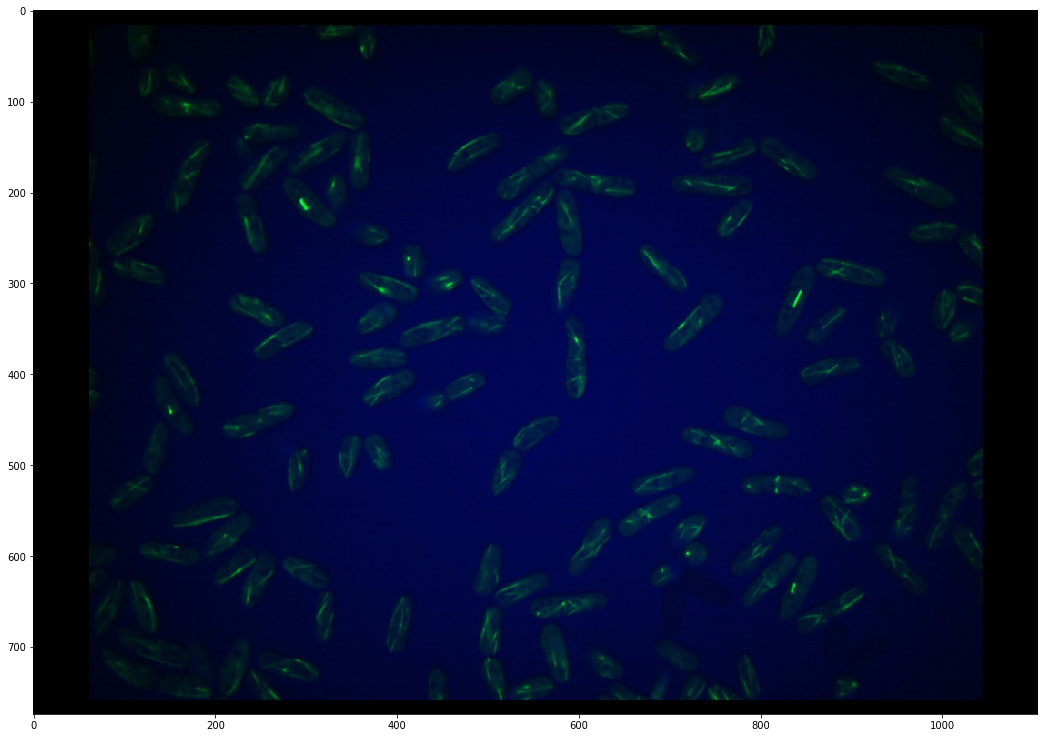

In [185]:
plt.figure(figsize=(18, 16))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

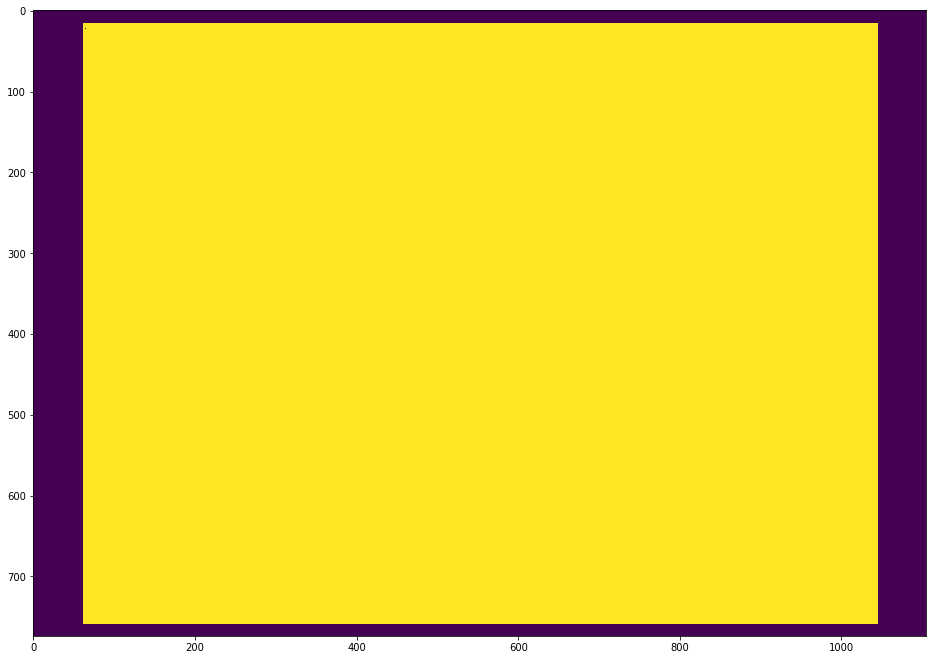

In [186]:
#Convert image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# make in binary image for threshold value of 1
_,thresh = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)

plt.figure(figsize=(16, 16))
plt.imshow(thresh)

In [187]:
# find contours
contours = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)

In [188]:
# crop the image 
crop = img[y:y+h,x:x+w]

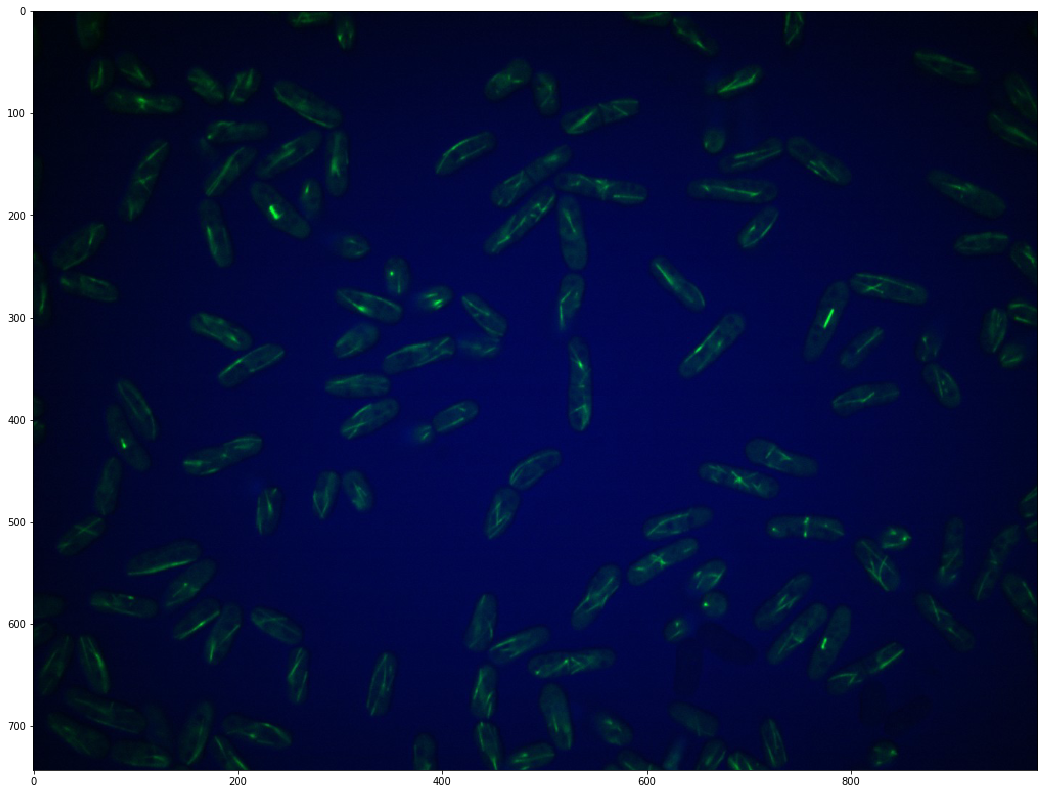

In [189]:
# display cropped image
plt.figure(figsize=(18, 16))
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))

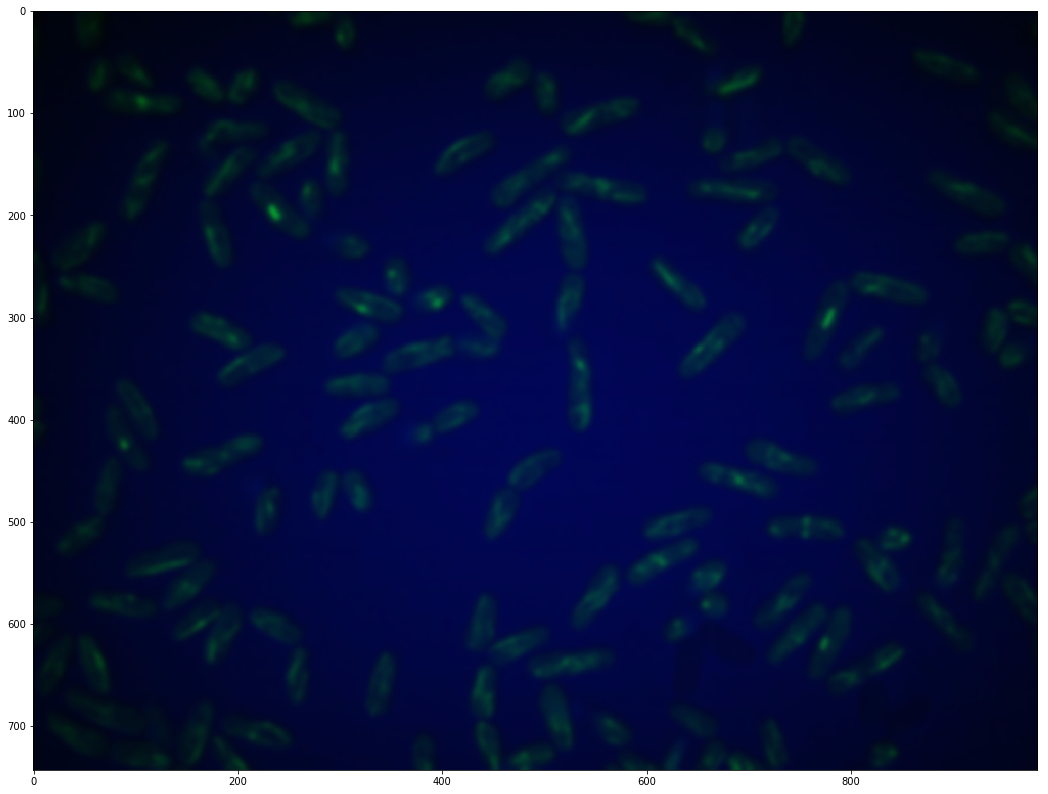

In [190]:
# Introduce Gaussian blur
blur = cv2.GaussianBlur(crop, (15,15), 0)

plt.figure(figsize=(18, 16))
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

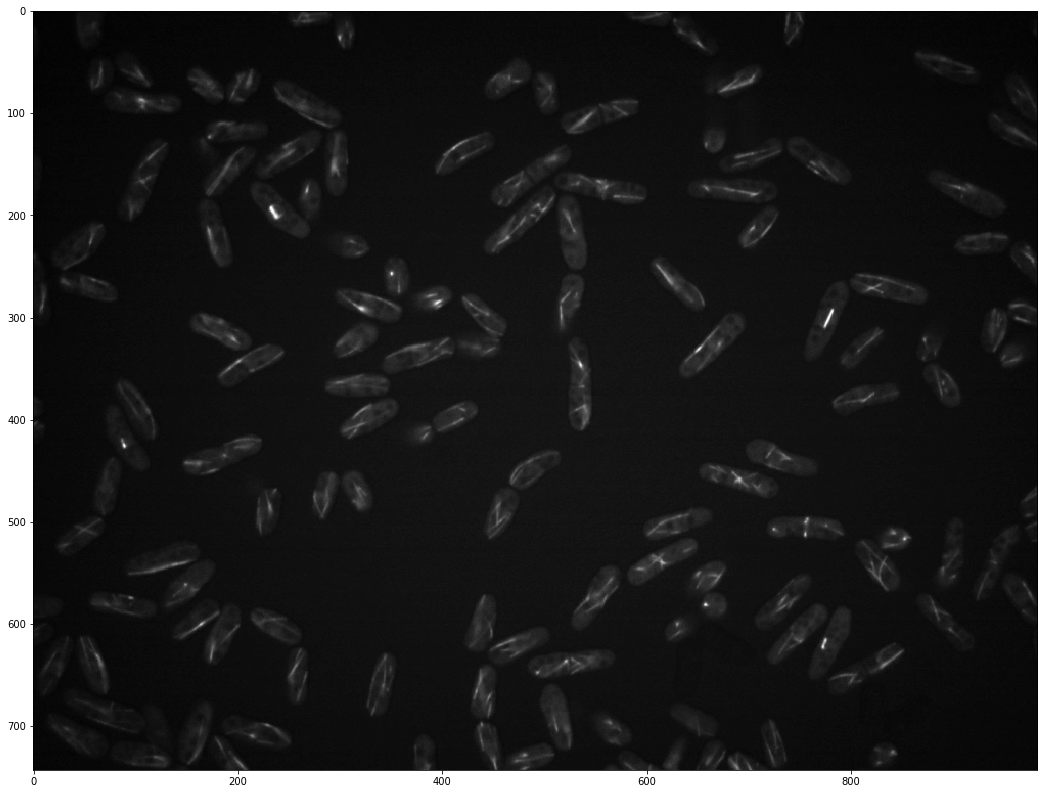

In [191]:
# Convert to gray scale
gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(18, 16))
plt.imshow(gray, cmap='gray')

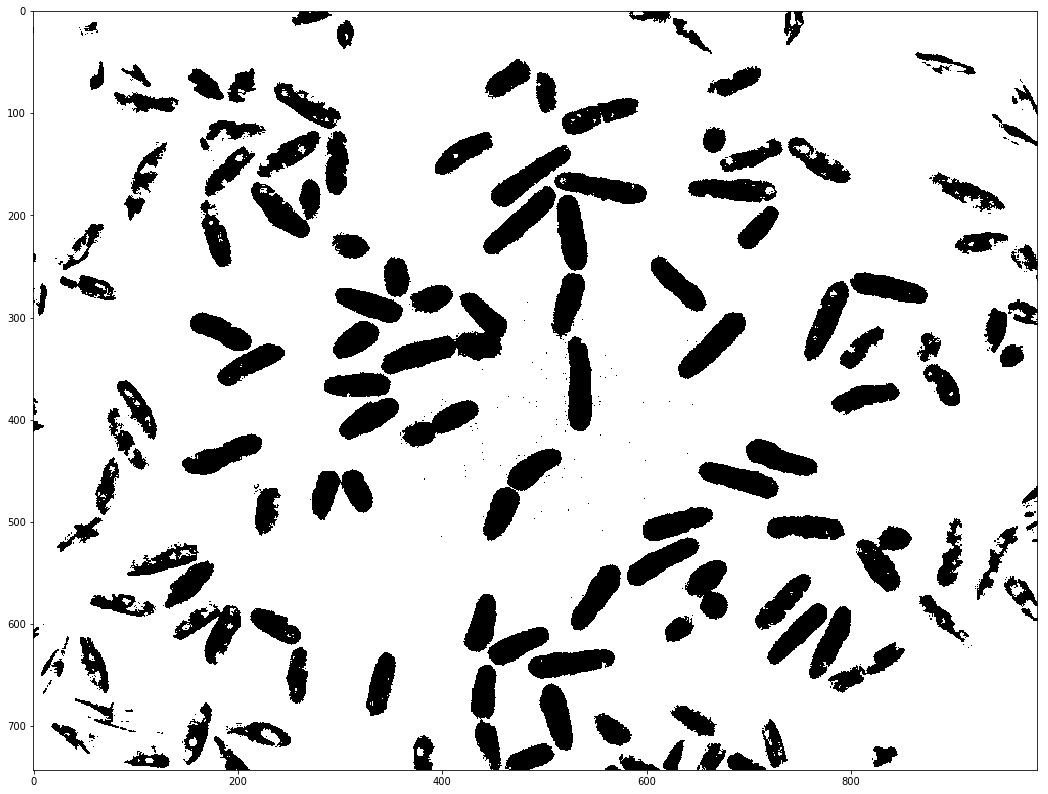

In [192]:

_, thresh = cv2.threshold(gray, 15, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(18, 16))
plt.imshow(thresh, cmap='gray')

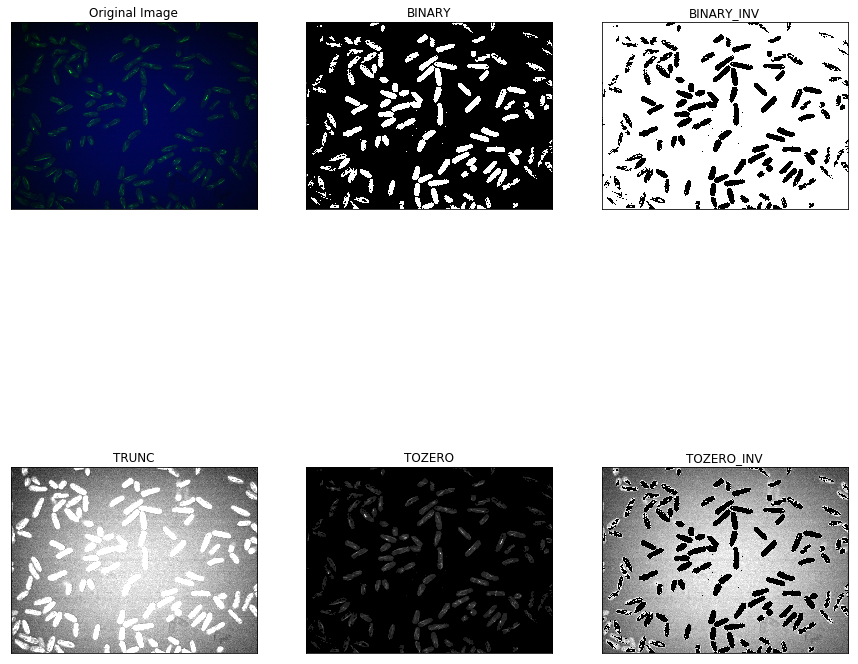

In [193]:
_,thresh1 = cv2.threshold(gray,15,255,cv2.THRESH_BINARY)
_,thresh2 = cv2.threshold(gray,15,255,cv2.THRESH_BINARY_INV)
_,thresh3 = cv2.threshold(gray,15,255,cv2.THRESH_TRUNC)
_,thresh4 = cv2.threshold(gray,15,255,cv2.THRESH_TOZERO)
_,thresh5 = cv2.threshold(gray,15,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
img = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()



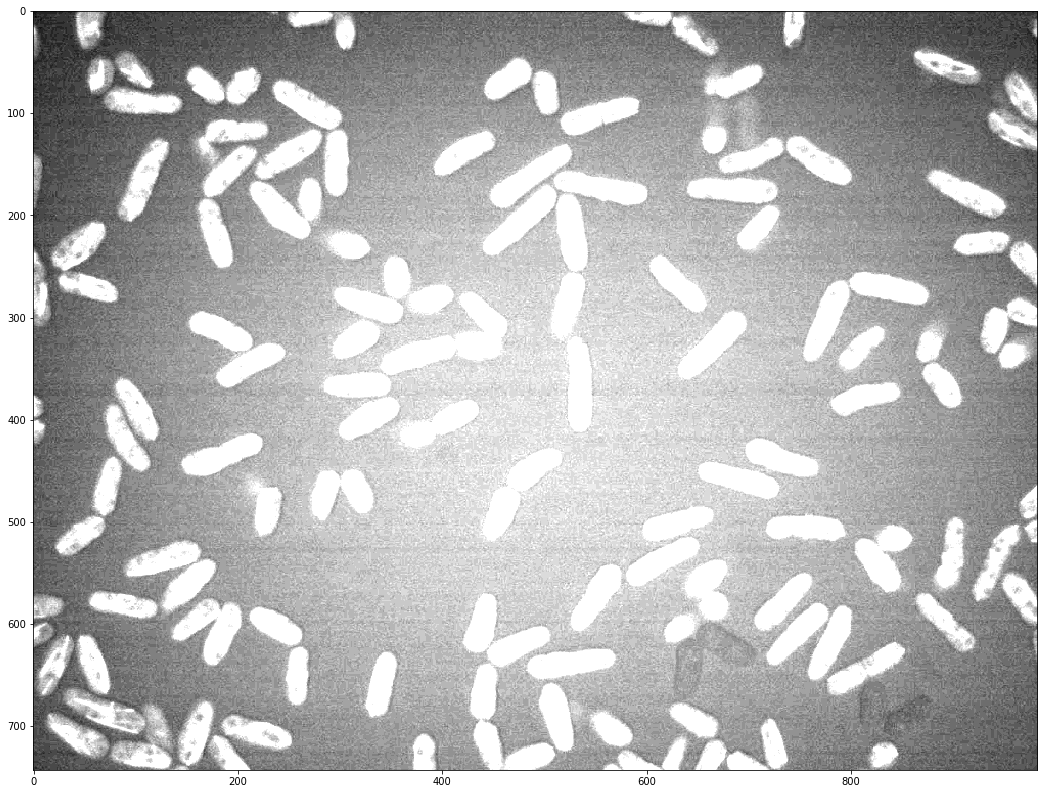

In [194]:
trunc = thresh3
plt.figure(figsize=(18, 16))
plt.imshow(trunc, cmap='gray')


In [195]:
# enhance contrast
gridsize1 = 15
gridsize2 = 15

clahe = cv2.createCLAHE(clipLimit=15.0, tileGridSize=(gridsize1,gridsize2))

gray1 = clahe.apply(trunc)


In [196]:
img.shape

(743, 983, 3)

In [197]:
trunc.shape

(743, 983)

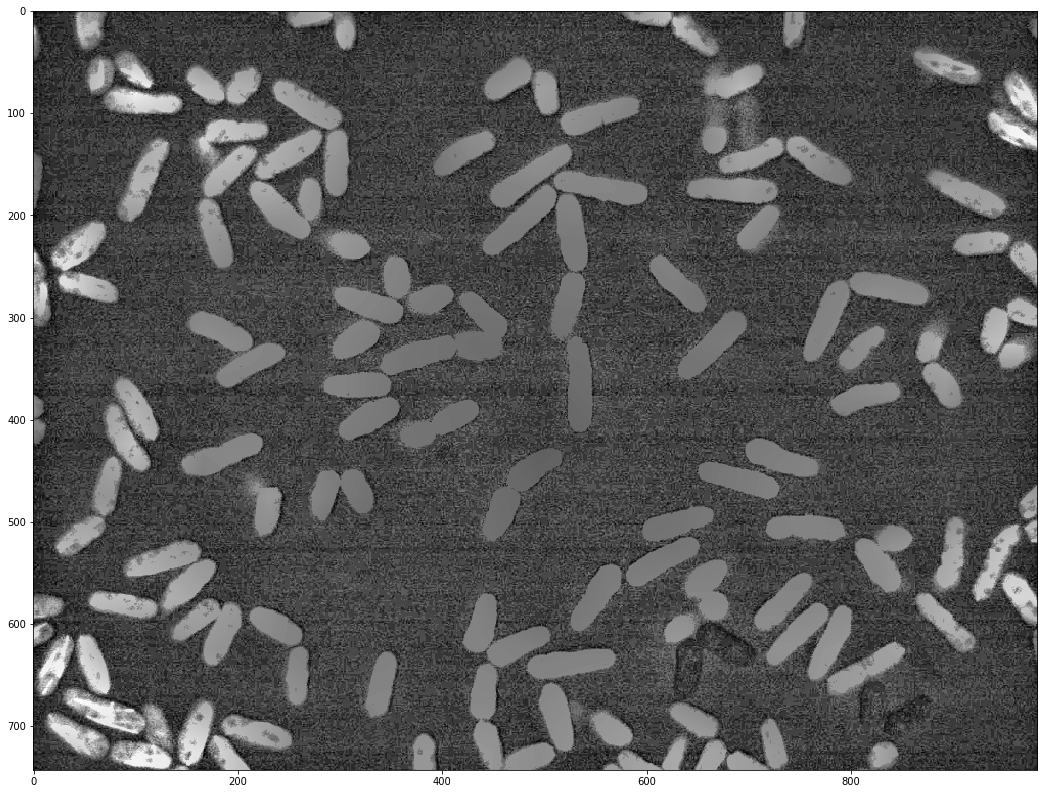

In [198]:
plt.figure(figsize=(18, 16))
plt.imshow(gray1, cmap='gray')

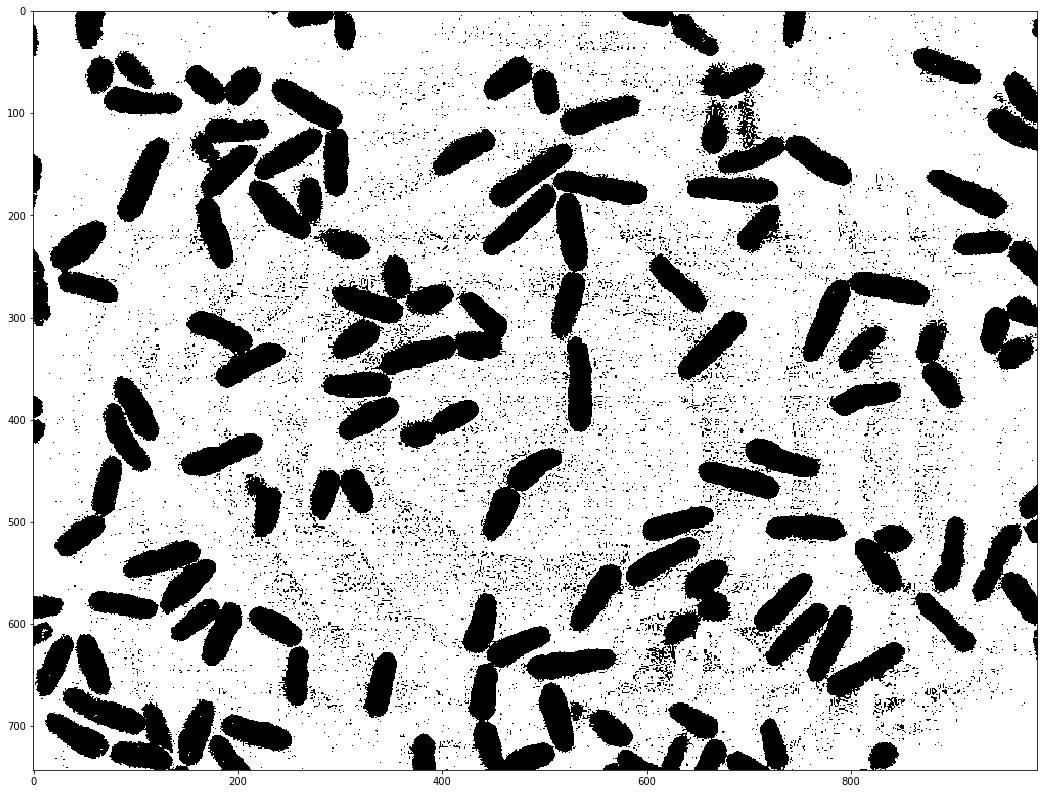

In [199]:
_,new_seg = cv2.threshold(gray1,60,255,cv2.THRESH_BINARY_INV)
plt.figure(figsize=(18, 16))
plt.imshow(new_seg, cmap='gray')

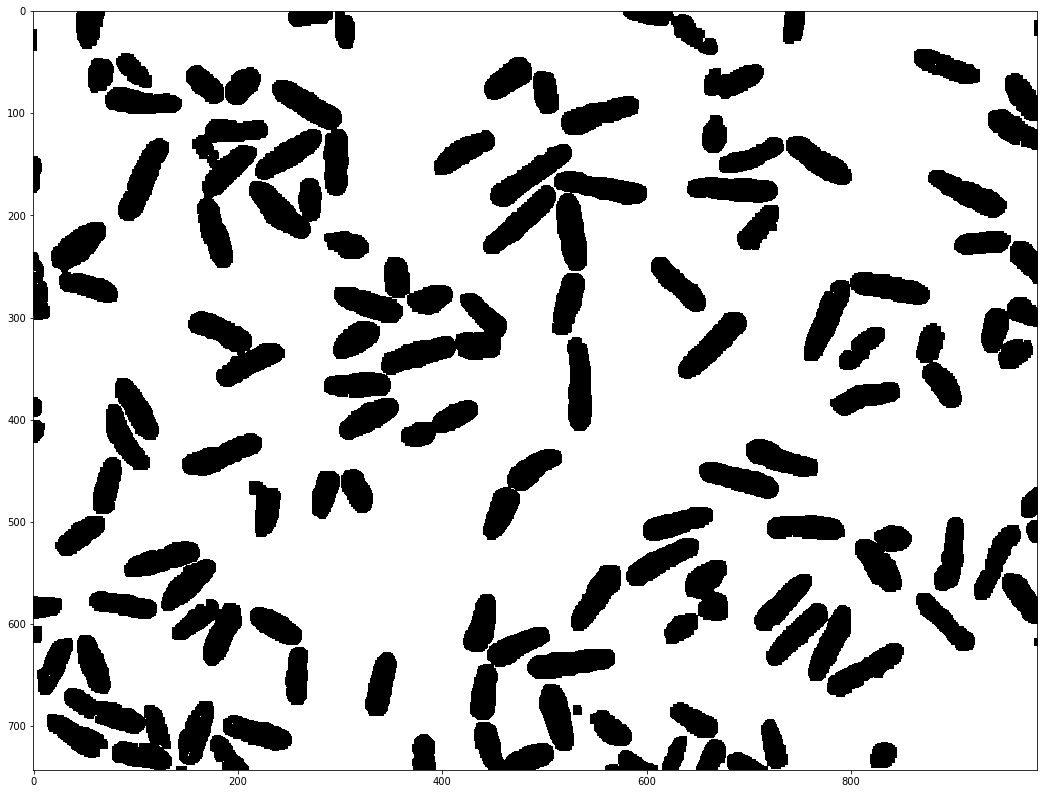

In [260]:
# closing
kernel = np.ones((7,7),np.uint8)
opening = cv2.morphologyEx(new_seg, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(18, 16))
plt.imshow(opening, cmap='gray')

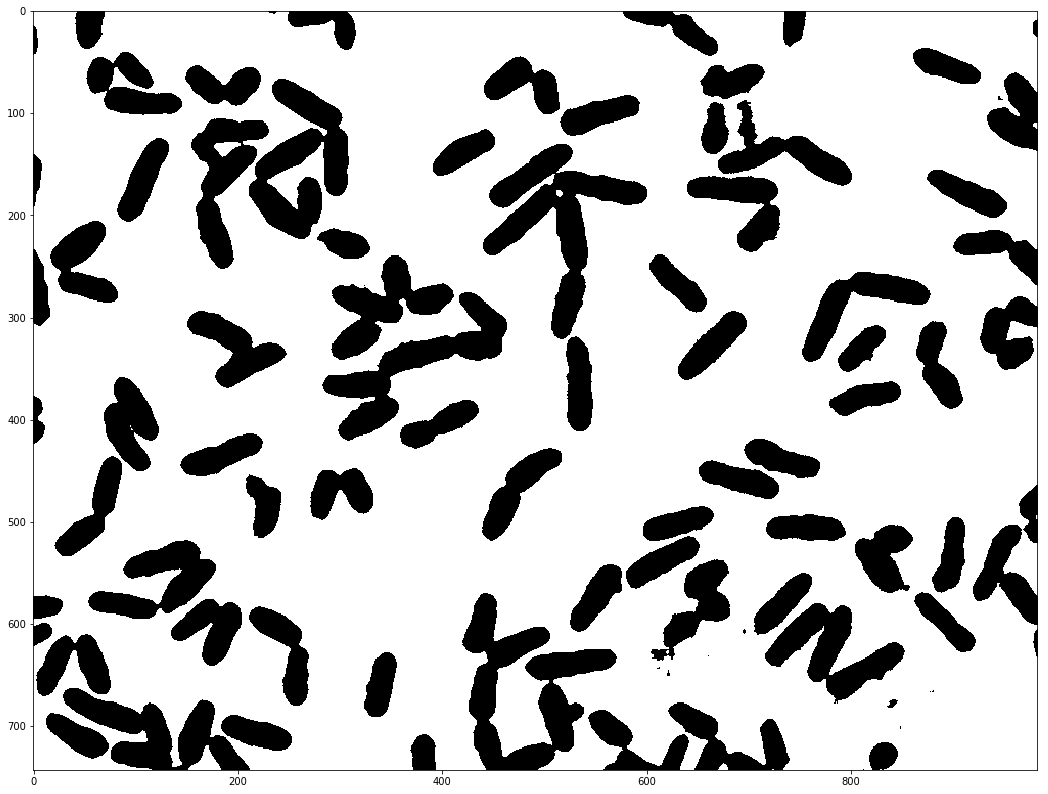

In [216]:
median = cv2.medianBlur(new_seg,7)
plt.figure(figsize=(18, 16))
plt.imshow(median, cmap='gray')

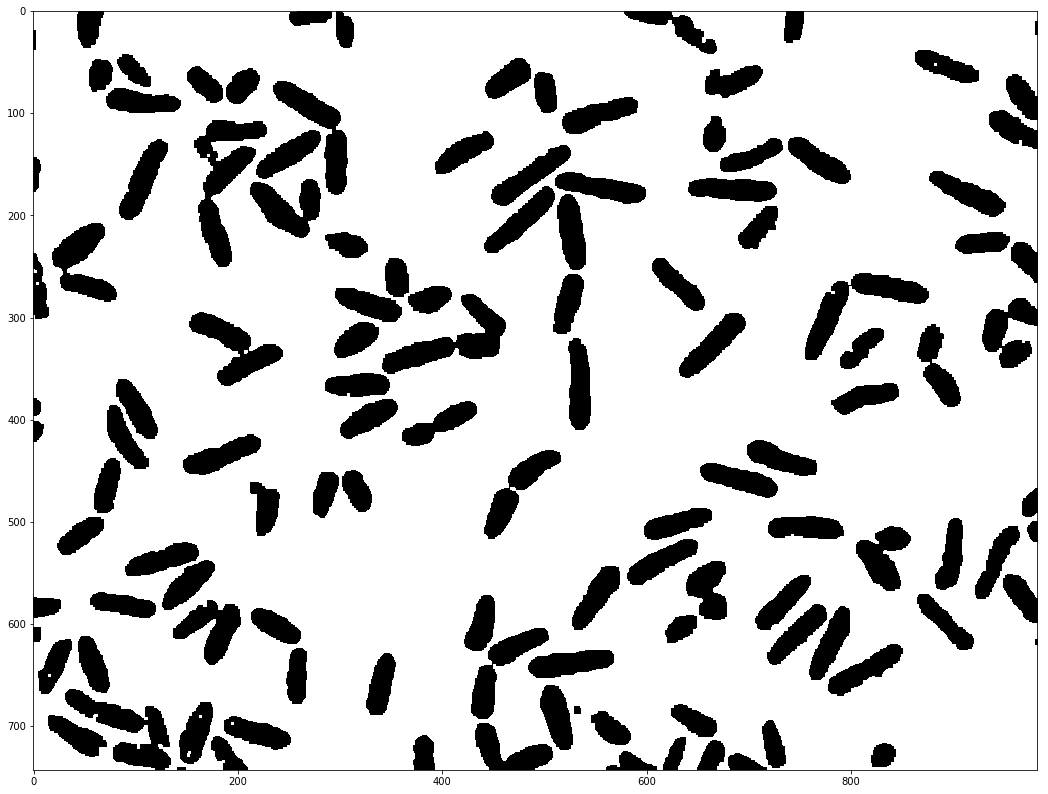

In [224]:
# erosion to separate connected cells
kernel = np.ones((3,3),np.uint8)
erosion = cv2.dilate(opening,kernel,iterations = 1)
plt.figure(figsize=(18, 16))
plt.imshow(erosion, cmap='gray')

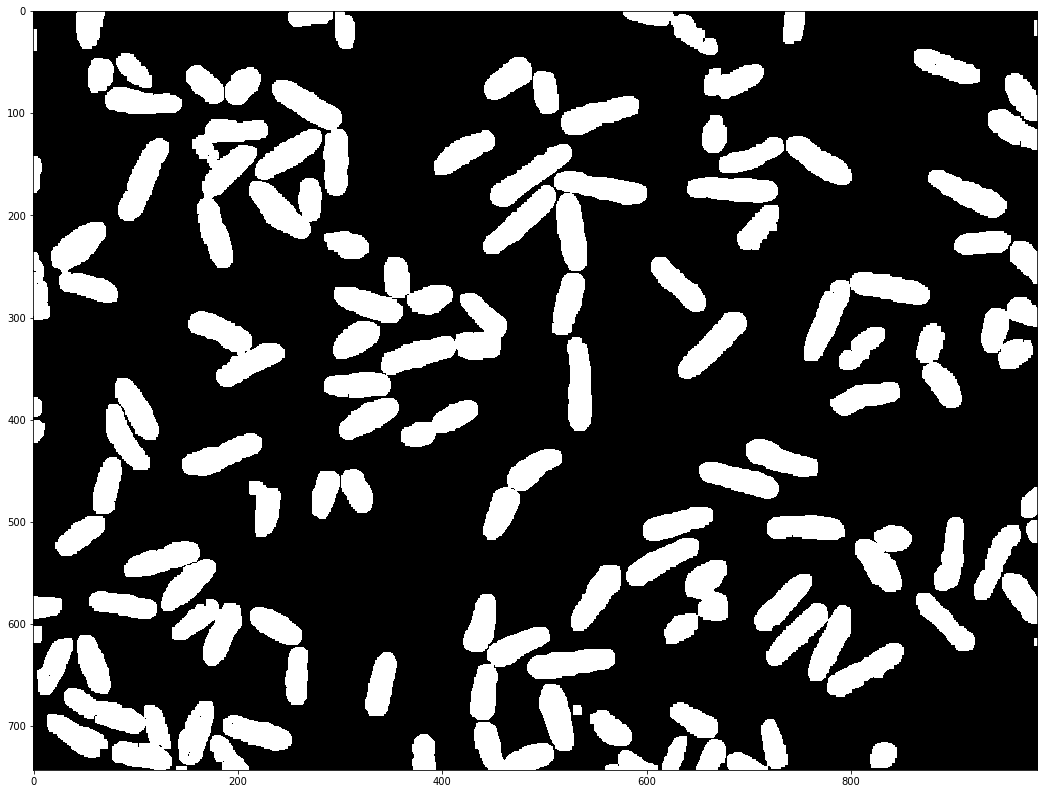

In [225]:
_,opening = cv2.threshold(opening,120,255,cv2.THRESH_BINARY_INV)
plt.figure(figsize=(18, 16))
plt.imshow(opening, cmap='gray')

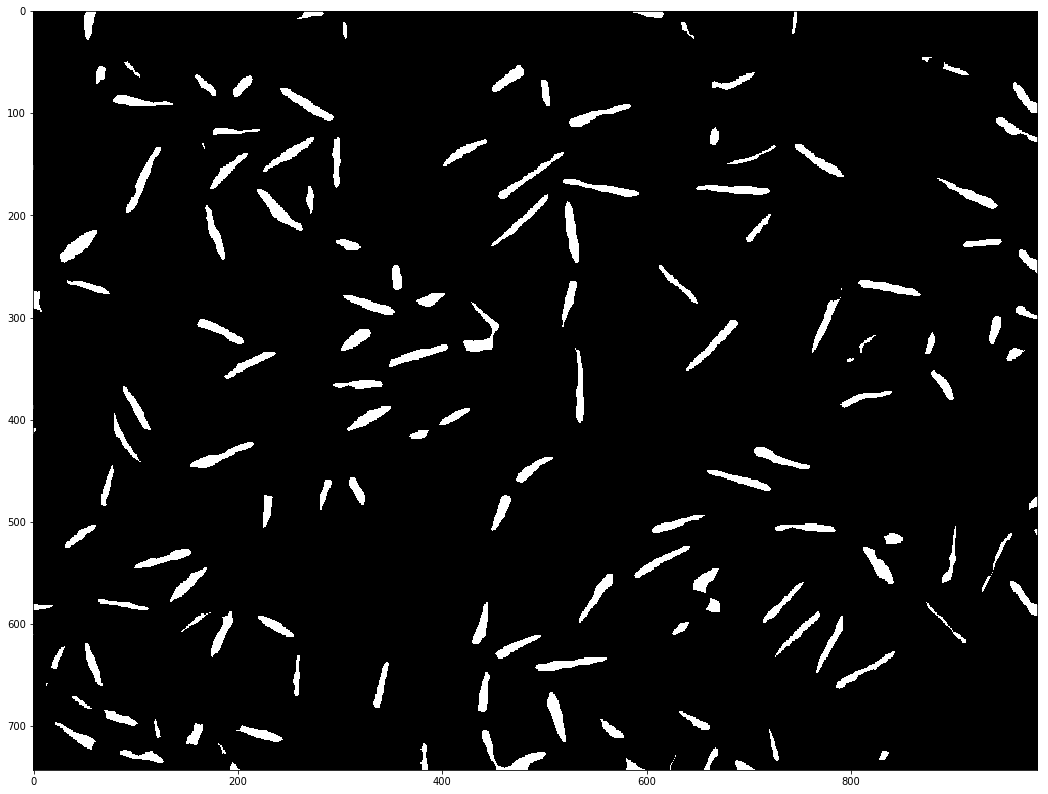

In [245]:
# count number of cells
elKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
erosion = cv2.erode(opening,elKernel,iterations = 2)
plt.figure(figsize=(18, 16))
plt.imshow(erosion, cmap='gray')

In [257]:
# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)

In [248]:
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

In [250]:
# Now, mark the region of unknown with zero
markers[erosion==255] = 0

In [254]:
markers = cv2.watershed(img,markers)
opening[markers == -1] = 255

In [255]:
markers

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       ..., 
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ...,  1,  1, -1],
       [-1, -1, -1, ..., -1, -1, -1]], dtype=int32)

In [256]:
markers.shape

(743, 983)